Data source:
- https://www.nasdaq.com/market-activity/stocks/aapl/historical?page=1&rows_per_page=1300&timeline=y5
- https://www.nasdaq.com/market-activity/stocks/msft/historical?page=1&rows_per_page=1300&timeline=y5
- https://www.nasdaq.com/market-activity/stocks/sbux/historical?page=1&rows_per_page=1300&timeline=y5

#Data Preparation


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

AAPL_df = pd.read_csv('HistoricalData_AAPL.csv')
MSFT_df = pd.read_csv('HistoricalData_MSFT.csv')
SBUX_df = pd.read_csv('HistoricalData_SBUX.csv')

In [3]:
AAPL_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/16/2024,$231.78,34082240,$231.60,$232.12,$229.84
1,10/15/2024,$233.85,64751370,$233.61,$237.49,$232.37
2,10/14/2024,$231.30,39882090,$228.70,$231.73,$228.60
3,10/11/2024,$227.55,31759190,$229.30,$229.41,$227.34
4,10/10/2024,$229.04,28183540,$227.78,$229.50,$227.17


In [4]:
AAPL_df.dtypes

,0
Date,object
Close/Last,object
Volume,int64
Open,object
High,object
Low,object


Date still on object, changed to datetime

In [5]:
AAPL_df['Date'] = pd.to_datetime(AAPL_df['Date'])

Close/Last still in str/object, convert to int

In [6]:
AAPL_df['Close/Last'] = AAPL_df['Close/Last'].replace('[\$,]', '', regex=True).astype(float)
AAPL_df['Close/Last'] = AAPL_df['Close/Last'].astype(int)

In [7]:
AAPL_df.dtypes

,0
Date,datetime64[ns]
Close/Last,int64
Volume,int64
Open,object
High,object
Low,object


In [8]:
AAPL_df.head(3)

,Date,Close/Last,Volume,Open,High,Low
0,2024-10-16,231,34082240,$231.60,$232.12,$229.84
1,2024-10-15,233,64751370,$233.61,$237.49,$232.37
2,2024-10-14,231,39882090,$228.70,$231.73,$228.60


Apply to all df

In [9]:
MSFT_df['Date'] = pd.to_datetime(MSFT_df['Date'])
MSFT_df['Close/Last'] = MSFT_df['Close/Last'].replace('[\$,]', '', regex=True).astype(float)
MSFT_df['Close/Last'] = MSFT_df['Close/Last'].astype(int)
SBUX_df['Date'] = pd.to_datetime(SBUX_df['Date'])
SBUX_df['Close/Last'] = SBUX_df['Close/Last'].replace('[\$,]', '', regex=True).astype(float)
SBUX_df['Close/Last'] = SBUX_df['Close/Last'].astype(int)

# Day-to-day percentage change(Daily returns)

Adjusted close maybe the more relevant feature to be count the day to day percentage change but since there only Close/Last, it will be used to se the day percentage change


In [10]:
AAPL_df["Day_Perc_Change"] = AAPL_df["Close/Last"].pct_change()*100
AAPL_df.head()

,Date,Close/Last,Volume,Open,High,Low,Day_Perc_Change
0,2024-10-16,231,34082240,$231.60,$232.12,$229.84,NaN
1,2024-10-15,233,64751370,$233.61,$237.49,$232.37,0.865801
2,2024-10-14,231,39882090,$228.70,$231.73,$228.60,-0.858369
3,2024-10-11,227,31759190,$229.30,$229.41,$227.34,-1.731602
4,2024-10-10,229,28183540,$227.78,$229.50,$227.17,0.881057


In [11]:
MSFT_df["Day_Perc_Change"] = MSFT_df["Close/Last"].pct_change()*100
SBUX_df["Day_Perc_Change"] = SBUX_df["Close/Last"].pct_change()*100

In [12]:
dperc_df = [AAPL_df,MSFT_df,SBUX_df]
titles = ["AAPL Day Percentage Change", "MSFT Day Percentage Change", "SBUX Day Percentage Change"]

Drop NaN Value (first row)

In [13]:
for var in dperc_df:
  var.dropna(axis = 0, inplace = True)

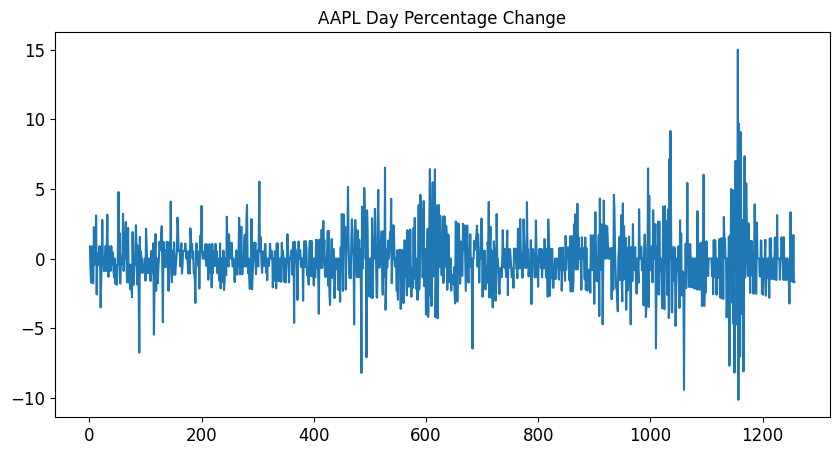

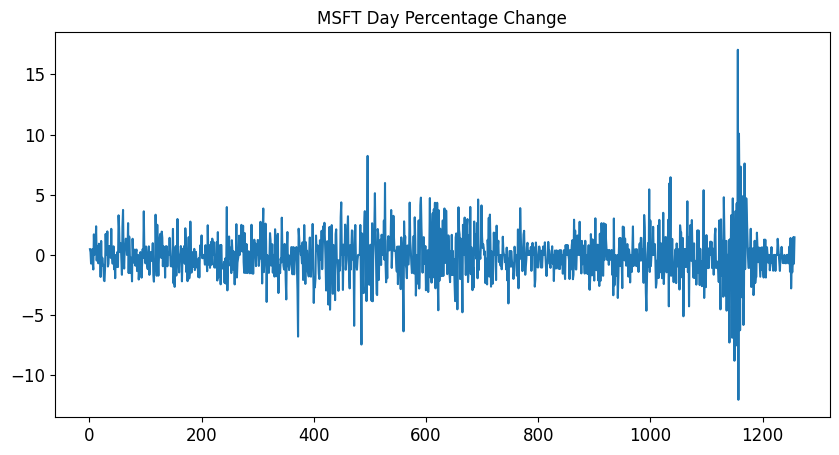

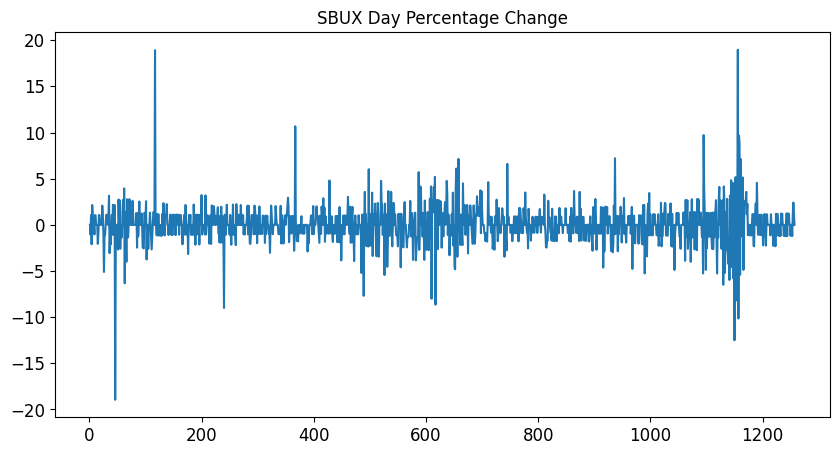

In [14]:
for var, title in zip(dperc_df, titles):
    var["Day_Perc_Change"].plot(figsize=(10, 5), fontsize=12)
    plt.title(title)
    plt.show()

It can be observed that for most of the days, the returns are between -5% to 5%, SBUX have a big spikes almost -20% and 20% but AAPL have more spike that reach less than -5% and more than 5%

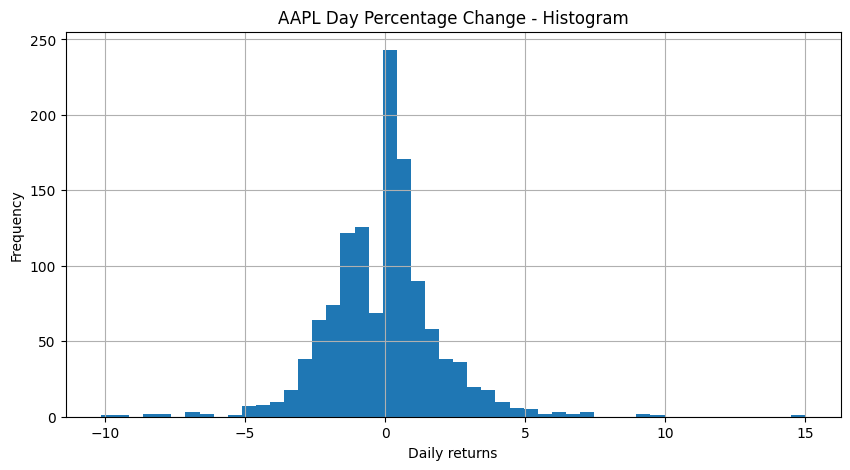

Statistics for AAPL Day Percentage Change:
count    1257.000000
mean       -0.089417
std         2.027104
min       -10.144928
25%        -1.257862
50%         0.000000
75%         0.833333
max        15.000000
Name: Day_Perc_Change, dtype: float64




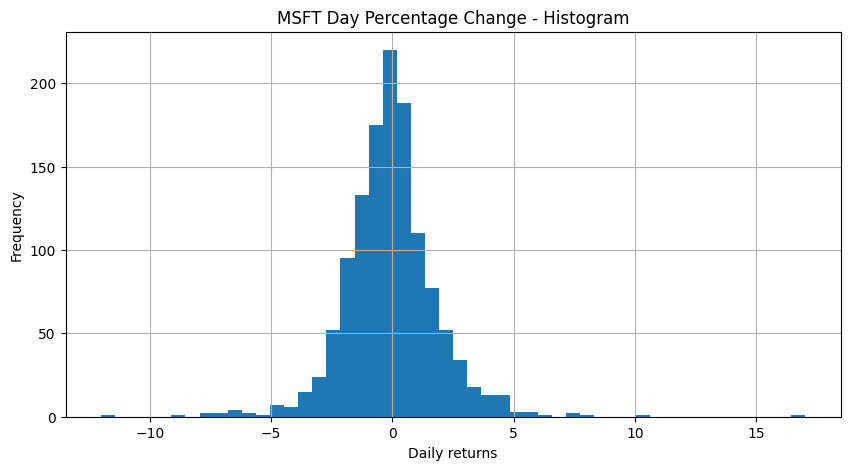

Statistics for MSFT Day Percentage Change:
count    1257.000000
mean       -0.068872
std         1.917421
min       -12.025316
25%        -1.081081
50%         0.000000
75%         0.819672
max        17.037037
Name: Day_Perc_Change, dtype: float64




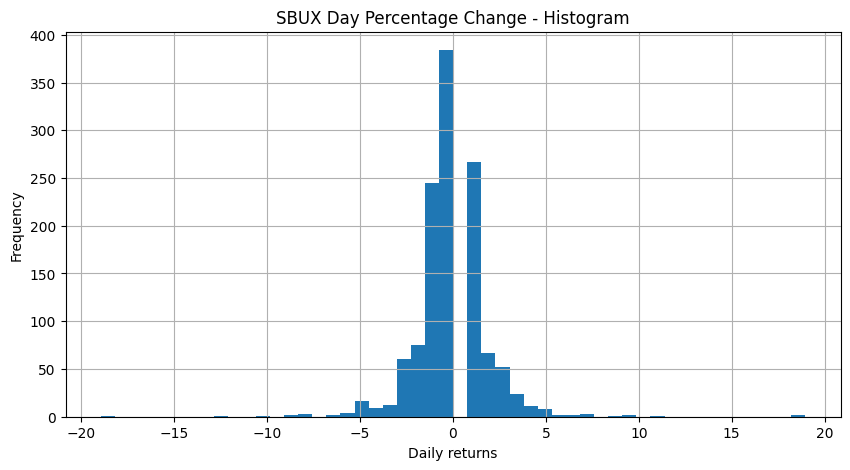

Statistics for SBUX Day Percentage Change:
count    1257.000000
mean        0.015205
std         2.152880
min       -18.947368
25%        -1.052632
50%         0.000000
75%         1.063830
max        18.965517
Name: Day_Perc_Change, dtype: float64




In [15]:
for var, title in zip(dperc_df, titles):
    var["Day_Perc_Change"].hist(bins=50, figsize=(10, 5))
    plt.title(f'{title} - Histogram')
    plt.xlabel("Daily returns")
    plt.ylabel("Frequency")
    plt.show()

    # statistics
    print(f'Statistics for {title}:')
    print(var["Day_Perc_Change"].describe())
    print('\n')

The daily percentage changes show that AAPL and MSFT had slight negative average returns of -0.09% and -0.07%, while SBUX had a small positive average return of 0.015%. SBUX had the largest daily change, ranging from -18.95% to +18.97%, while AAPL and MSFT had smaller extremes, with AAPL ranging from -10.14% to +15% and MSFT from -12.03% to +17.04%.

#Trend Analysis

Next we add a new column ‘Trend’ whose values are based on the day-to-day percentage change we calculated above. Trend is determined from below relationship —

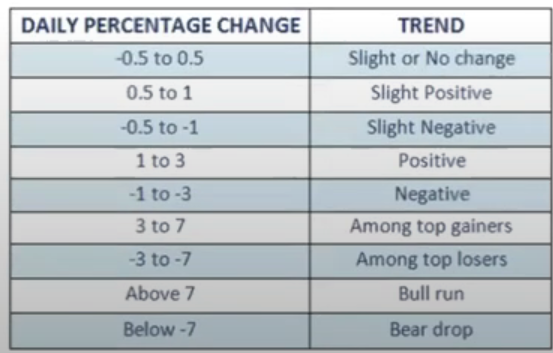

In [16]:
def trend(x):
    if x > -0.5 and x <= 0.5:
        return "Slight or No change"
    elif x > 0.5 and x <= 1:
        return "Slight Positive"
    elif x > -1 and x <= -0.5:
        return "Slight Negative"
    elif x > 1 and x <= 3:
        return "Positive"
    elif x > -3 and x <= -1:
        return "Negative"
    elif x > 3 and x <= 7:
        return "Among top gainers"
    elif x > -7 and x <= -3:
        return "Among top losers"
    elif x > 7:
        return "Bull run"
    elif x <= -7:
        return "Bear drop"

In [17]:
for var in dperc_df:
  var["Trend"]= np.zeros(var["Day_Perc_Change"].count())
  var["Trend"]= var["Day_Perc_Change"].apply(lambda x:trend(x))

In [18]:
AAPL_df.head(3)

,Date,Close/Last,Volume,Open,High,Low,Day_Perc_Change,Trend
1,2024-10-15,233,64751370,$233.61,$237.49,$232.37,0.865801,Slight Positive
2,2024-10-14,231,39882090,$228.70,$231.73,$228.60,-0.858369,Slight Negative
3,2024-10-11,227,31759190,$229.30,$229.41,$227.34,-1.731602,Negative


Visualizing Trend Frequency with Pie-Chart

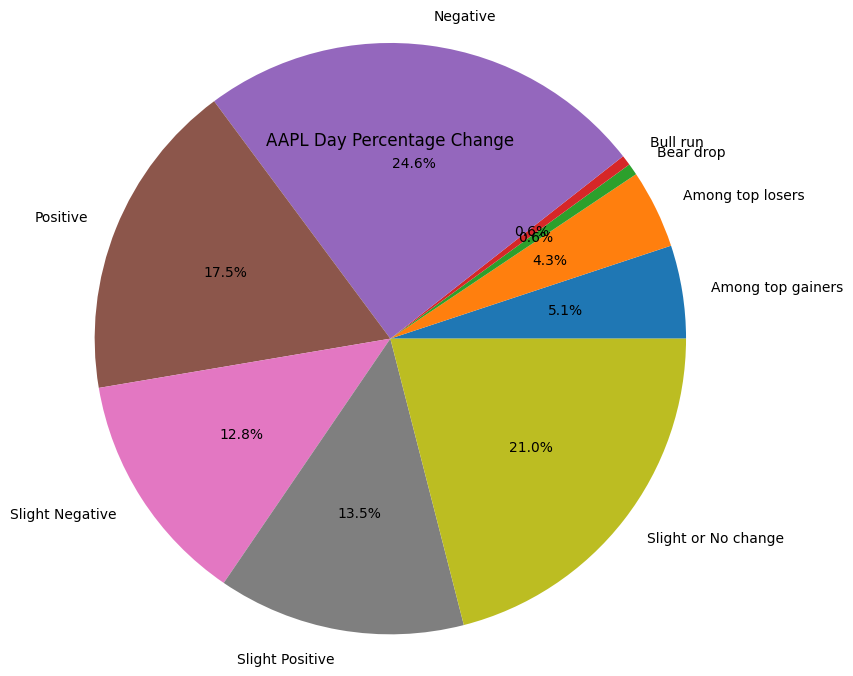

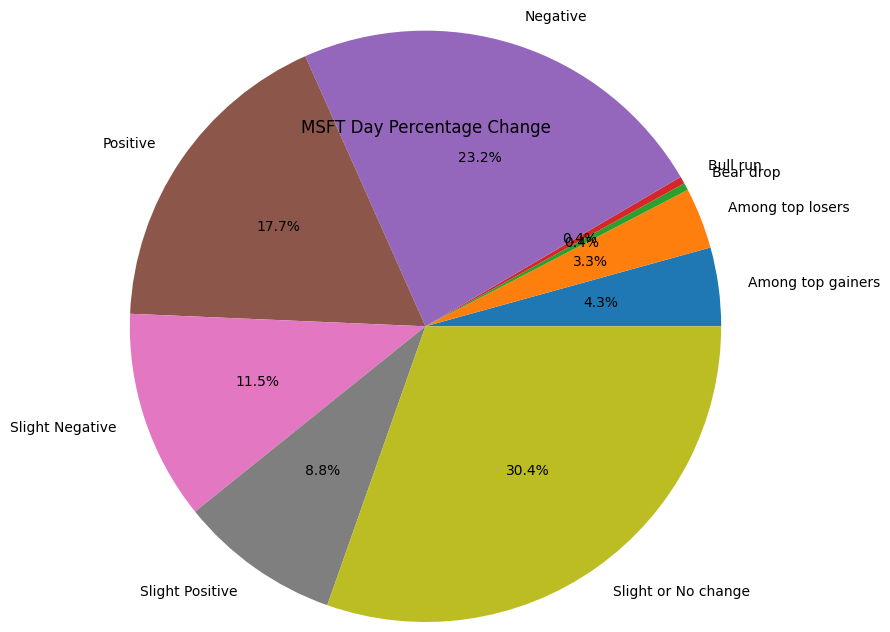

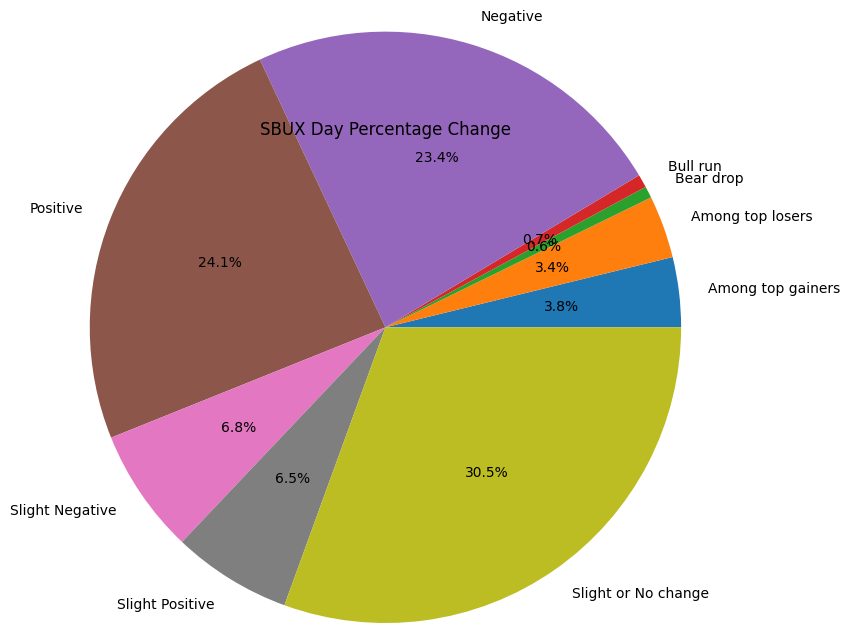

In [19]:
for var, title in zip(dperc_df, titles):
    pie_data = var.groupby('Trend')
    pie_label = sorted([i for i in var['Trend'].unique()])

    plt.pie(pie_data['Trend'].count(), labels=pie_label, autopct='%1.1f%%', radius=2)

    plt.title(title)
    plt.show()

Over the past five years, AAPL, MSFT, and SBUX most days categorized as "Slight or No change," "Negative," or "Positive." Extreme events like "Bull runs" or "Bear drops" were rare, occurring less than 1% of the time across all three stocks.

#Volatility analysis
7-day rolling annualized volatility to assess price fluctuation and risk over time.

<Axes: >

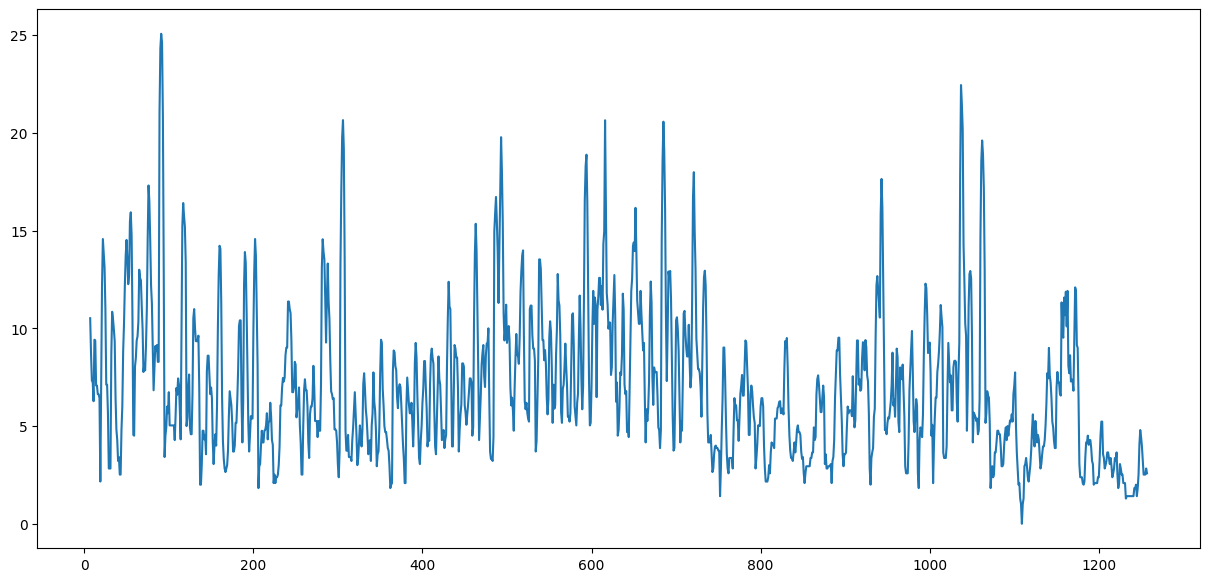

In [20]:
AAPL_vol = AAPL_df["Close/Last"].rolling(7).std()*np.sqrt(7)
AAPL_vol.plot(figsize = (15, 7))

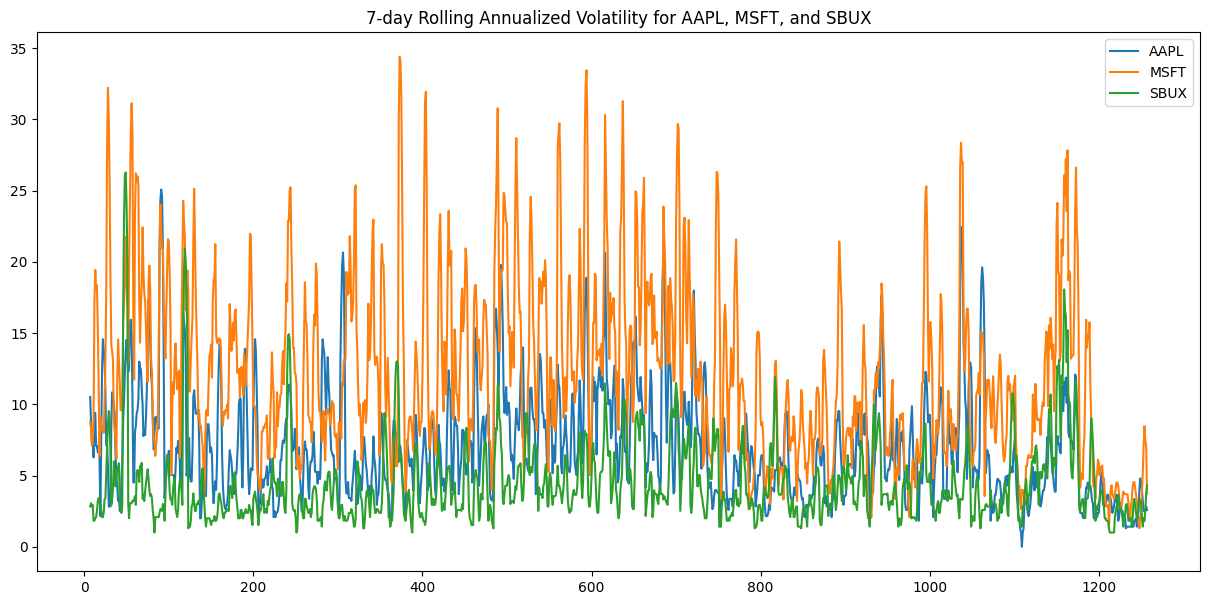

In [21]:
volatility = pd.DataFrame({
    'AAPL': AAPL_df["Close/Last"].rolling(7).std() * np.sqrt(7),
    'MSFT': MSFT_df["Close/Last"].rolling(7).std() * np.sqrt(7),
    'SBUX': SBUX_df["Close/Last"].rolling(7).std() * np.sqrt(7)
})

volatility.plot(figsize=(15, 7))
plt.title("7-day Rolling Annualized Volatility for AAPL, MSFT, and SBUX")
plt.show()


The graph shows that MSFT has the biggest ups and downs in its price, with frequent large changes that can go over 30%. AAPL also experiences some fluctuations, but they aren’t as extreme as MSFT's, usually staying between 5% and 15%. SBUX, on the other hand, is the most stable, with fewer and smaller changes in its price, typically staying between 5% and 10%. Overall, MSFT is the most unpredictable, AAPL has moderate changes, and SBUX is the most steady, showing more consistent behavior over time.